Degree Centrality:
Node 1: 0.2
Node 2: 0.30000000000000004
Node 3: 0.2
Node 4: 0.5
Node 6: 0.30000000000000004
Node 5: 0.30000000000000004
Node 8: 0.5
Node 7: 0.2
Node 9: 0.30000000000000004
Node 10: 0.1
Node 11: 0.1

Closeness Centrality:
Node 1: 0.38461538461538464
Node 2: 0.5263157894736842
Node 3: 0.43478260869565216
Node 4: 0.625
Node 6: 0.5
Node 5: 0.5263157894736842
Node 8: 0.625
Node 7: 0.47619047619047616
Node 9: 0.5263157894736842
Node 10: 0.35714285714285715
Node 11: 0.4

Betweenness Centrality:
Node 1: 0.018518518518518517
Node 2: 0.1574074074074074
Node 3: 0.05185185185185185
Node 4: 0.34074074074074073
Node 6: 0.12962962962962965
Node 5: 0.05185185185185185
Node 8: 0.37777777777777777
Node 7: 0.0
Node 9: 0.22777777777777777
Node 10: 0.0
Node 11: 0.0

Proximity Prestige:
Node 1: 2.3636363636363638
Node 2: 1.7272727272727273
Node 3: 2.090909090909091
Node 4: 1.4545454545454546
Node 6: 1.8181818181818181
Node 5: 1.7272727272727273
Node 8: 1.4545454545454546
Node 7: 1.9090909

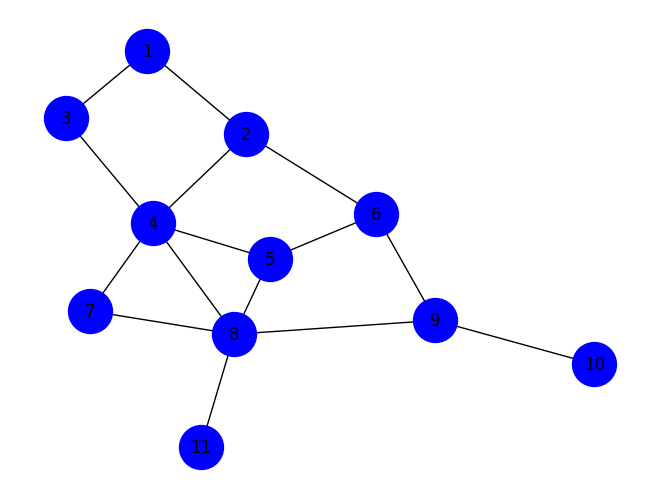

In [ ]:
# ques 1
# Compute Network Statistics such as Centrality (Degree, Closeness & Betweenness) and Proximity Prestige for a suitable Social Network
import networkx as nx

# Create a sample social network graph
G = nx.Graph()
G.add_edges_from([ (1,2) , (1,3) , (2,4) , (2,6) , (3,4) , (4,5) , (4,8) , (4,7) , (7,8) , (5,6) , (5,8) , (6,9) , (9,8) , (9,10) , (8,11) ])

nx.draw(G, with_labels=True, node_color='blue', node_size=1000)

# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Compute proximity prestige
def calculate_proximity_prestige(graph):
    prestige_scores = {}
    for node in graph.nodes():
        distances = nx.single_source_shortest_path_length(graph, node)
        prestige_scores[node] = sum(distances.values()) / len(distances)
    return prestige_scores

prestige_scores = calculate_proximity_prestige(G)

# Print results
print("Degree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nCloseness Centrality:")
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nBetweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nProximity Prestige:")
for node, prestige in prestige_scores.items():
    print(f"Node {node}: {prestige}")


Random walk of length 1 ends at node: 2
Random walk of length 2 ends at node: 3
Random walk of length 3 ends at node: 1
Random walk of length 4 ends at node: 4
Random walk of length 5 ends at node: 2
Hitting Time from node 1 to node 5: 16.067
Commute Time between node 1 and node 5: 24.488999999999997


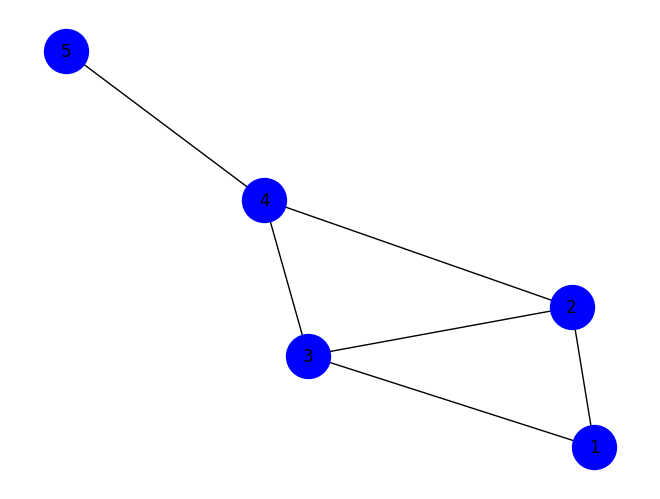

In [ ]:
# ques 2
# Implement Random Walk for a suitable Social Network. Compute Hitting and Commute time for some starting and target node.
import networkx as nx
import numpy as np

def random_walk(graph, start_node, steps):
    current_node = start_node
    for _ in range(steps):
        neighbors = list(graph.neighbors(current_node))
        if len(neighbors) == 0:
            return current_node
        current_node = np.random.choice(neighbors)
    return current_node

def hitting_time(graph, start_node, target_node, num_walks):
    total_steps = 0
    for _ in range(num_walks):
        current_node = start_node
        steps = 0
        while current_node != target_node:
            current_node = random_walk(graph, current_node, 1)
            steps += 1
        total_steps += steps
    return total_steps / num_walks

def commute_time(graph, start_node, target_node, num_walks):
    hit_time = hitting_time(graph, start_node, target_node, num_walks)
    reverse_hit_time = hitting_time(graph, target_node, start_node, num_walks)
    return hit_time + reverse_hit_time

# Create a sample social network graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)])

nx.draw(G, with_labels=True, node_color='blue', node_size=1000)

# Define starting and target nodes
start_node = 1
target_node = 5
num_walks = 1000

# performing 5 random walks of different lengths starting from node 1
for i in range(1, 6):
    end_node = random_walk(G, start_node, i)
    print(f"Random walk of length {i} ends at node: {end_node}")

# Compute hitting time
hit_time = hitting_time(G, start_node, target_node, num_walks)
print(f"Hitting Time from node {start_node} to node {target_node}: {hit_time}")

# Compute commute time
commute_time_val = commute_time(G, start_node, target_node, num_walks)
print(f"Commute Time between node {start_node} and node {target_node}: {commute_time_val}")


Neumann Kernel Importance:
Node 1: 8
Node 2: 11
Node 3: 11
Node 4: 10
Node 5: 4

Neumann Kernel Relatedness between Node 1 and Node 5: 0


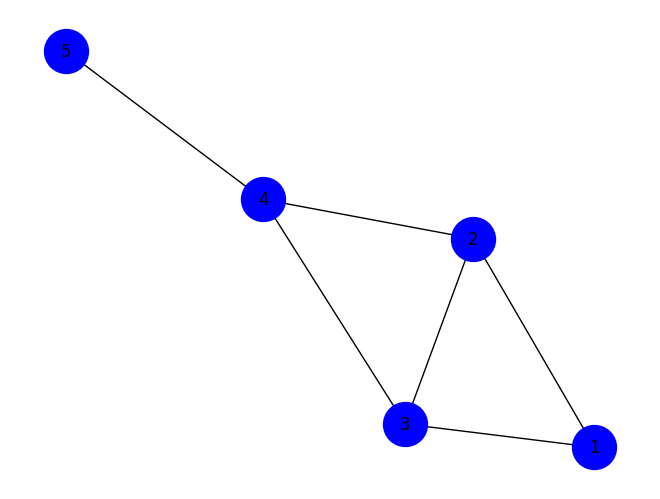

In [ ]:
# ques 3
# Compute Importance and Relatedness Neumann Kernal proximity measures for suitable Social Network.
import networkx as nx

def neumann_kernel_importance(graph, node):
    importance = graph.degree(node)  # Initialize with node degree
    for neighbor in graph.neighbors(node):
        importance += graph.degree(neighbor)
    return importance

def neumann_kernel_relatedness(graph, node1, node2):
    common_neighbors = nx.common_neighbors(graph, node1, node2)
    relatedness = sum(graph.degree(common_neighbor) for common_neighbor in common_neighbors)
    return relatedness

# Create a sample social network graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)])

nx.draw(G, with_labels=True, node_color='blue', node_size=1000)

# Compute Neumann kernel importance for each node
neumann_importance = {node: neumann_kernel_importance(G, node) for node in G.nodes()}
print("Neumann Kernel Importance:")
for node, importance in neumann_importance.items():
    print(f"Node {node}: {importance}")

# Compute Neumann kernel relatedness between nodes
node1 = 1
node2 = 5
neumann_relatedness = neumann_kernel_relatedness(G, node1, node2)
print(f"\nNeumann Kernel Relatedness between Node {node1} and Node {node2}: {neumann_relatedness}")


PageRank Scores:
Node 1: 0.16732597748750058
Node 2: 0.1615603304028505
Node 3: 0.3095533617067985
Node 4: 0.1615603304028505
Node 5: 0.16732597748750058


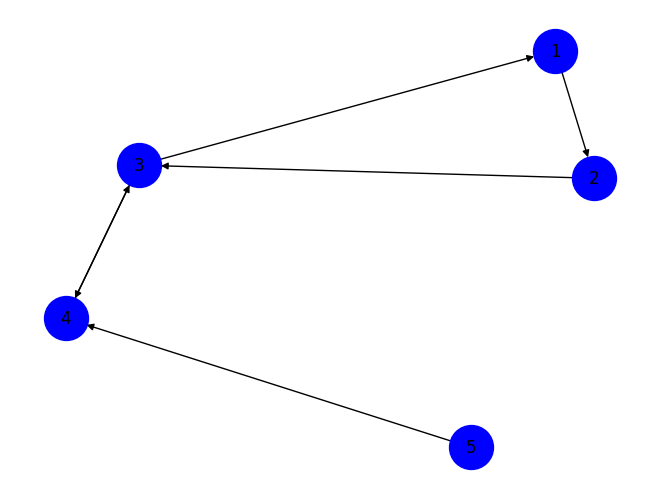

In [ ]:
# ques 4
# Implement Page Rank Algorithm for rating the importance of web pages using directed graph.
import networkx as nx

def page_rank(graph, damping_factor=0.85, max_iterations=100, tolerance=1e-6):
    # Initialize page rank values
    num_nodes = graph.number_of_nodes()
    pr = {node: 1 / num_nodes for node in graph.nodes()}

    # Main iteration loop
    for _ in range(max_iterations):
        new_pr = {}
        total_diff = 0

        for node in graph.nodes():
            rank_sum = sum(pr[neighbor] / graph.out_degree(neighbor) for neighbor in graph.neighbors(node))
            new_pr[node] = (1 - damping_factor) / num_nodes + damping_factor * rank_sum
            total_diff += abs(new_pr[node] - pr[node])

        if total_diff < tolerance:
            break

        pr = new_pr

    return pr

# Create a directed graph representing web pages and their links
G = nx.DiGraph()
# G.add_edges_from([(1, 2), (1, 3), (2, 1), (3, 1), (3, 2), (4, 2)])
G.add_edges_from([(1,2),(2,3),(3,1),(3,4),(4,3),(5,4)])

nx.draw(G, with_labels=True, node_color='blue', node_size=1000)

# Calculate PageRank scores
pagerank_scores = page_rank(G)

# Print PageRank scores
print("PageRank Scores:")
for node, score in pagerank_scores.items():
    print(f"Node {node}: {score}")


In [ ]:
# ques 5
# Implement Markov Cluster Algorithm over undirected graph.
import numpy as np

def normalize(matrix):
    """
    Normalize the matrix by dividing each element by the sum of its row.
    """
    row_sums = matrix.sum(axis=1)
    return matrix / row_sums[:, np.newaxis]

def inflate(matrix, inflate_factor):
    """
    Apply inflation to the matrix by raising each element to the power of inflate_factor.
    """
    return np.power(matrix, inflate_factor)

def expand(matrix, expand_factor):
    """
    Apply expansion to the matrix by taking the matrix to the power of expand_factor.
    """
    return np.linalg.matrix_power(matrix, expand_factor)

def markov_cluster_algorithm(matrix, inflate_factor=2, expand_factor=2, max_iterations=100, tolerance=1e-6):
    """
    Perform the Markov Cluster Algorithm (MCL) on the input matrix.

    Parameters:
    - matrix: the input matrix representing the graph structure.
    - inflate_factor: the inflation parameter.
    - expand_factor: the expansion parameter.
    - max_iterations: maximum number of iterations.
    - tolerance: convergence tolerance.

    Returns:
    - clusters: a list of clusters, where each cluster contains the indices of nodes in that cluster.
    """
    # Initialize the matrix
    matrix = normalize(matrix)

    # Main loop
    for _ in range(max_iterations):
        # Expansion
        matrix = expand(matrix, expand_factor)

        # Inflation
        matrix = inflate(matrix, inflate_factor)

        # Normalize
        matrix = normalize(matrix)

        # Check for convergence
        if np.sum(np.abs(matrix - np.eye(matrix.shape[0]))) < tolerance:
            break

    # Extract clusters
    clusters = []
    for i in range(matrix.shape[0]):
        cluster = np.where(matrix[i] > 0)[0]
        clusters.append(cluster)

    return clusters

# Example undirected graph represented as an adjacency matrix
adjacency_matrix = np.array([[0, 1, 1, 0],
                              [1, 0, 1, 0],
                              [1, 1, 0, 1],
                              [0, 0, 1, 0]])

# Apply the Markov Cluster Algorithm
clusters = markov_cluster_algorithm(adjacency_matrix)

# Print the clusters
print("Clusters:")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: {cluster}")


Clusters:
Cluster 1: [2]
Cluster 2: [2]
Cluster 3: [2]
Cluster 4: [2]


In [ ]:
# ques 6
# Compare Proximity Measures such as graph distance, common neighbors Jaccard's coefficient for Link Prediction using suitable dataset.
import networkx as nx
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from itertools import combinations
import numpy as np

# Load a suitable dataset (e.g., Zachary's Karate Club)
G = nx.karate_club_graph()

# Split edges into training and testing sets
edges = list(G.edges())
positive_edges, negative_edges = train_test_split(edges, test_size=0.2, random_state=42)

# Create a graph without testing edges for prediction
G_train = G.copy()
G_train.remove_edges_from(negative_edges)

# Define functions to compute proximity measures
def graph_distance(G, node1, node2):
    try:
        return nx.shortest_path_length(G, source=node1, target=node2)
    except nx.NetworkXNoPath:
        return 999999  # A large finite value

def common_neighbors(G, node1, node2):
    return len(list(nx.common_neighbors(G, node1, node2)))

def jaccards_coefficient(G, node1, node2):
    neighbors1 = set(G.neighbors(node1))
    neighbors2 = set(G.neighbors(node2))
    if len(neighbors1) + len(neighbors2) == 0:
        return 0
    return len(neighbors1.intersection(neighbors2)) / len(neighbors1.union(neighbors2))

# Compute proximity measures for positive and negative edges
proximity_measures = {
    "Graph Distance": [],
    "Common Neighbors": [],
    "Jaccard's Coefficient": []
}
for edge in positive_edges:
    node1, node2 = edge
    proximity_measures["Graph Distance"].append(graph_distance(G_train, node1, node2))
    proximity_measures["Common Neighbors"].append(common_neighbors(G_train, node1, node2))
    proximity_measures["Jaccard's Coefficient"].append(jaccards_coefficient(G_train, node1, node2))

for edge in negative_edges:
    node1, node2 = edge
    proximity_measures["Graph Distance"].append(graph_distance(G_train, node1, node2))
    proximity_measures["Common Neighbors"].append(common_neighbors(G_train, node1, node2))
    proximity_measures["Jaccard's Coefficient"].append(jaccards_coefficient(G_train, node1, node2))

# Replace inf values with a large finite value
for measure in proximity_measures.values():
    for i in range(len(measure)):
        if measure[i] == float('inf'):
            measure[i] = 999999  # A large finite value

# Flatten the proximity measures for input into ROC AUC
X = [[proximity_measures[key][i] for key in proximity_measures] for i in range(len(positive_edges) + len(negative_edges))]
y = [1] * len(positive_edges) + [0] * len(negative_edges)

# Compute ROC AUC scores for each proximity measure
roc_auc_scores = {}
for key in proximity_measures:
    roc_auc_scores[key] = roc_auc_score(y, proximity_measures[key])

# Print ROC AUC scores for each proximity measure
print("ROC AUC Scores:")
for key, score in roc_auc_scores.items():
    print(f"{key}: {score}")


ROC AUC Scores:
Graph Distance: 0.0
Common Neighbors: 0.534274193548387
Jaccard's Coefficient: 0.5438508064516129


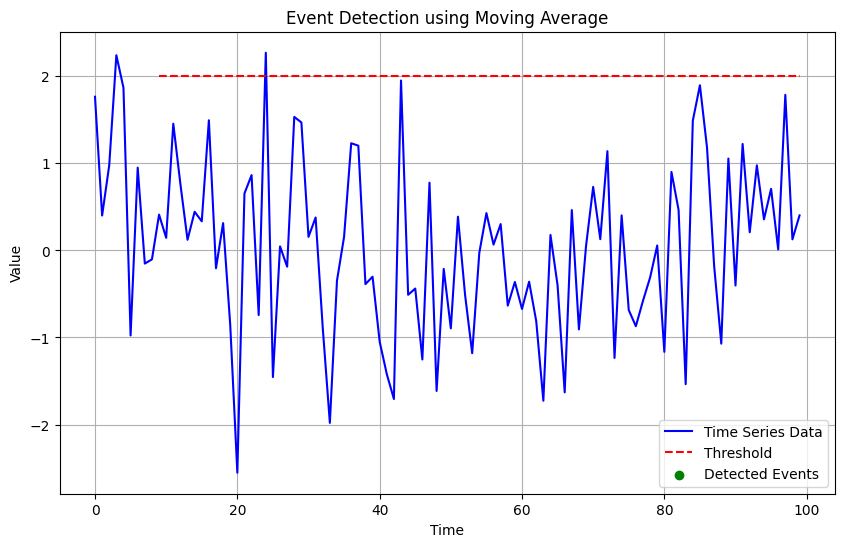

In [ ]:
# ques 7
# Implement Univariate Temporal Methods for Event Detection over suitable dataset.
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample time series data (you can replace this with your own dataset)
np.random.seed(0)
time_series = np.random.normal(loc=0, scale=1, size=100)  # Normal distribution as an example

# Define a function to detect events using moving average
def detect_events_moving_average(time_series, window_size, threshold):
    moving_avg = np.convolve(time_series, np.ones(window_size)/window_size, mode='valid')
    events = np.where(moving_avg > threshold)[0]
    return events

# Set parameters for moving average method
window_size = 10
threshold = 2  # Adjust threshold as needed based on the characteristics of your data

# Detect events using moving average
events = detect_events_moving_average(time_series, window_size, threshold)

# Plot the time series data and detected events
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Time Series Data', color='blue')
plt.plot(np.arange(window_size-1, len(time_series)), np.ones(len(time_series)-window_size+1)*threshold, '--', label='Threshold', color='red')
plt.scatter(events + window_size - 1, time_series[events + window_size - 1], color='green', label='Detected Events')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Event Detection using Moving Average')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# ques 8
# Measure Influence via Reachability for a social network using suitable directed graph.
import networkx as nx
import numpy as np

# Create a directed graph representing a social network
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5), (5, 6), (6, 7)])

# Compute reachability matrix
reachability_matrix = nx.floyd_warshall_numpy(G)

# Create a mapping from node indices to reachability matrix indices
node_to_index = {node: index for index, node in enumerate(G.nodes())}

# Define a function to compute influence via reachability
def influence_via_reachability(reachability_matrix, node_to_index, source_node):
    index = node_to_index[source_node]
    reachable_nodes = np.where(reachability_matrix[index] != np.inf)[0]
    influence = len(reachable_nodes)
    return influence

# Compute influence via reachability for each node
influence = {}
for node in G.nodes():
    influence[node] = influence_via_reachability(reachability_matrix, node_to_index, node)

# Print influence via reachability for each node
print("Influence via Reachability:")
for node, inf in influence.items():
    print(f"Node {node}: {inf}")


Influence via Reachability:
Node 1: 7
Node 2: 5
Node 3: 5
Node 4: 4
Node 5: 3
Node 6: 2
Node 7: 1
